
# Task 5-1 Solution:  Groupby and Pandas

<br><br>

In [2]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

warnings.filterwarnings('ignore')
np.set_printoptions(precision=3, suppress=True)

pd.set_option('max_rows', 150)

%matplotlib inline

<br><br>

### Using our Batting.csv file, your task was to answer two questions:
1. Which team has hit the most home runs (cumulative)?
2. Which team hit the most home runs in 2015?

Then, plot the total home runs hit per decade to see which decade had the most.
<br>

In [3]:
batting = pd.read_csv('../../resources/baseball/Batting.csv')
batting.shape

(101332, 22)

In [4]:
batting.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118.0,30.0,32.0,6.0,...,13.0,8.0,1.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137.0,28.0,40.0,4.0,...,19.0,3.0,1.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133.0,28.0,44.0,10.0,...,27.0,1.0,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120.0,29.0,39.0,11.0,...,16.0,6.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN


In [5]:
batting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101332 entries, 0 to 101331
Data columns (total 22 columns):
playerID    101332 non-null object
yearID      101332 non-null int64
stint       101332 non-null int64
teamID      101332 non-null object
lgID        100595 non-null object
G           101332 non-null int64
AB          96183 non-null float64
R           96183 non-null float64
H           96183 non-null float64
2B          96183 non-null float64
3B          96183 non-null float64
HR          96183 non-null float64
RBI         95759 non-null float64
SB          94883 non-null float64
CS          72729 non-null float64
BB          96183 non-null float64
SO          88345 non-null float64
IBB         59620 non-null float64
HBP         93373 non-null float64
SH          89845 non-null float64
SF          60151 non-null float64
GIDP        70075 non-null float64
dtypes: float64(16), int64(3), object(3)
memory usage: 17.0+ MB


#### Question 1: (team with most HRs cumulative)

In [6]:
most_hrs = batting.groupby('teamID').sum().sort_values('HR', ascending=False)
most_hrs.head()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
teamID,,,,,,,,,,,,,,,,,,,
NYA,8286851,4574,215305,602449.0,85715.0,160743.0,26490.0,5347.0,15218.0,79424.0,10951.0,4442.0,63393.0,77216.0,2643.0,4428.0,9487.0,2890.0,9612.0
CHN,9418853,5181,250719,715765.0,96003.0,188022.0,31444.0,7103.0,13530.0,85517.0,14977.0,3660.0,63583.0,91819.0,3245.0,4557.0,12690.0,2566.0,9783.0
DET,8187763,4427,220310,613702.0,83222.0,163090.0,27362.0,5995.0,13160.0,76414.0,10697.0,4788.0,61570.0,77873.0,2319.0,3999.0,10912.0,2767.0,9744.0
BOS,8397515,4635,218971,613571.0,83309.0,163909.0,30235.0,5398.0,12883.0,77099.0,8834.0,4203.0,62200.0,77190.0,2733.0,4295.0,10504.0,2985.0,10474.0
PHI,9233178,5106,245033,694762.0,89959.0,181493.0,31081.0,6422.0,12503.0,81112.0,14097.0,3293.0,63168.0,90395.0,3484.0,4892.0,11571.0,2692.0,9627.0


In [7]:
most_hrs.index[0]

'NYA'

#### Question 2: (team with most HRs in 2015)

In [8]:
hrs_2015 = batting[batting['yearID'] == 2015].groupby('teamID').sum().sort_values('HR', ascending=False)
hrs_2015.head()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
teamID,,,,,,,,,,,,,,,,,,,
TOR,104780,60,2337,5509.0,891.0,1480.0,308.0,17.0,232.0,852.0,88.0,23.0,570.0,1151.0,12.0,54.0,36.0,62.0,140.0
HOU,92690,50,2333,5459.0,729.0,1363.0,278.0,26.0,230.0,691.0,121.0,48.0,486.0,1392.0,22.0,56.0,28.0,43.0,102.0
BAL,96720,51,2249,5485.0,713.0,1370.0,246.0,20.0,217.0,686.0,44.0,25.0,418.0,1331.0,23.0,51.0,20.0,32.0,127.0
NYA,112840,58,2401,5567.0,764.0,1397.0,272.0,19.0,212.0,737.0,63.0,25.0,554.0,1227.0,23.0,63.0,24.0,54.0,105.0
SEA,102765,57,2407,5544.0,656.0,1379.0,262.0,22.0,198.0,624.0,69.0,45.0,478.0,1336.0,31.0,36.0,38.0,35.0,123.0


In [9]:
hrs_2015.index[0]

'TOR'

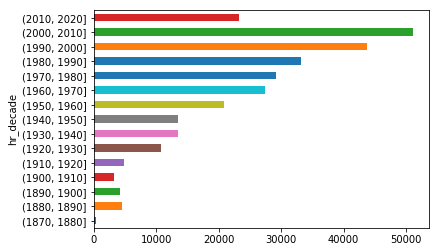

In [10]:
bins = [1870, 1880, 1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
# or use bins=range(1870, 2030, 10)
batting['hr_decade'] = pd.cut(batting['yearID'], bins=bins)
batting.groupby('hr_decade').sum()['HR'].plot(kind='barh');